# Creating word vectors

We're creating word vectors

#### dependencies

In [46]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
import pandas as pd
%matplotlib inline

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rahul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load data

In [4]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
len(gutenberg.fileids())

18

#### Tokenize text

In [8]:
gberg_sent_tokens =sent_tokenize(gutenberg.raw())

In [11]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [10]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [12]:
gberg_sents = gutenberg.sents()

In [13]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [15]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [16]:
len(gutenberg.words())

2621613

In [20]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=6)

In [21]:
model.save('raw_gutenberg_model.w2v')

####  Explore model

In [2]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

NameError: name 'gensim' is not defined

In [3]:
model['dog']

NameError: name 'model' is not defined

In [26]:
model.most_similar('dog')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('puppy', 0.8443112969398499),
 ('sweeper', 0.7595192193984985),
 ('pet', 0.7595160007476807),
 ('cage', 0.758665919303894),
 ('mouse', 0.7559219598770142),
 ('thief', 0.7475982904434204),
 ('whip', 0.7471016049385071),
 ('bridle', 0.7422050833702087),
 ('broth', 0.7401137351989746),
 ('bullet', 0.7400715947151184)]

In [27]:
model.most_similar('think')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suppose', 0.8693114519119263),
 ('manage', 0.8419548273086548),
 ('contradict', 0.8380929231643677),
 ('know', 0.8336083292961121),
 ('downright', 0.8309130668640137),
 ('pretend', 0.8207477331161499),
 ('NOW', 0.8099753260612488),
 ('imagine', 0.8051385283470154),
 ('_you_', 0.804832935333252),
 ('disagree', 0.8045080304145813)]

In [28]:
model.most_similar('day')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('morning', 0.7916195392608643),
 ('night', 0.7766121625900269),
 ('time', 0.7404267191886902),
 ('evening', 0.7263864874839783),
 ('month', 0.7053602933883667),
 ('week', 0.6790882349014282),
 ('morrow', 0.6785069108009338),
 ('sabbath', 0.6780635118484497),
 ('Saturday', 0.6747521162033081),
 ('feasting', 0.6701326370239258)]

In [29]:
model.most_similar('father')

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.8642861843109131),
 ('brother', 0.8369231224060059),
 ('sister', 0.8032242059707642),
 ('Amnon', 0.7830511331558228),
 ('daughter', 0.7704812288284302),
 ('wife', 0.7691302299499512),
 ('bondwoman', 0.7454540729522705),
 ('uncle', 0.7388720512390137),
 ('aunt', 0.7326337099075317),
 ('birthright', 0.7282782793045044)]

In [30]:
model.doesnt_match("mother father daughter dog".split())

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'dog'

In [31]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.7976123094558716),
 ('sister', 0.7892742156982422),
 ('husband', 0.7556591033935547),
 ('daughter', 0.7460013628005981),
 ('wife', 0.7413243055343628),
 ('brother', 0.7114339470863342),
 ('Sarah', 0.7086539268493652),
 ('daughters', 0.7013208270072937),
 ('Sarai', 0.6991352438926697),
 ('child', 0.6913526058197021)]

In [1]:
model.most_similar(positive=['king', 'woman'], negative=['man']) 

NameError: name 'model' is not defined

#### Reduce word vectore dimensionality with t-SNE

In [35]:
len(model.wv.vocab)

17011

In [39]:
X = model[model.wv.vocab]

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [43]:
type(X)

numpy.ndarray

In [44]:
tsne = TSNE(n_components=2, n_iter=1000)

In [45]:
X_2d = tsne.fit_transform(X)

In [47]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['tokens'] = model.wv.vocab.keys()

In [48]:
coords_df.head()

,x,y,tokens
0,-27.197001,17.712717,virginity
1,-9.144820,5.449254,arts
2,-10.150946,-30.763252,growes
3,-38.679119,31.459414,beryl
4,-41.603741,28.332804,onyx


In [50]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [51]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [53]:
coords_df.head(20)

,x,y,tokens
0,-27.197000,17.712717,virginity
1,-9.144820,5.449254,arts
2,-10.150946,-30.763252,growes
3,-38.679120,31.459414,beryl
4,-41.603740,28.332804,onyx
5,-9.792909,-48.503185,Will
6,15.549377,-19.111479,commissioned
7,47.057014,-4.594992,dined
8,41.973633,-34.183030,recommend
9,-51.906150,24.711342,twenty


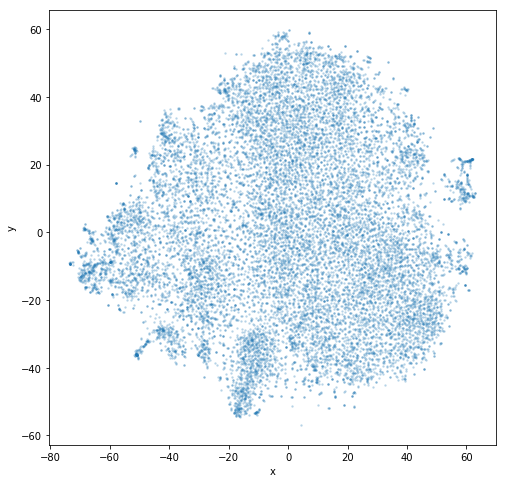

In [55]:
_=coords_df.plot.scatter('x','y', figsize=(8, 8), marker='.', s=10, alpha=0.2)

In [56]:
output_notebook()

Loading BokehJS ...

In [57]:
subset_df = coords_df.sample(n=5000)

In [58]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.tokens)

In [4]:
show(p)

NameError: name 'show' is not defined